## Contest_20140127 - Solutions

***

### [Analyzing the Dataset](#analyzing-the-dataset)

#### Reading the Dataset

In [90]:
import warnings
import pandas as pd

In [91]:
warnings.filterwarnings('ignore')

data_path  = 'Student_Performance.csv'
students_data = pd.read_csv(data_path)

students_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#### Highlighting the relationship between features using plots

In [92]:
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [93]:
students_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


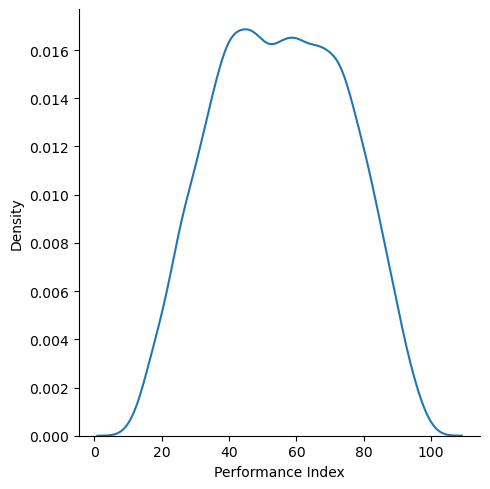

In [94]:
sns.displot(data=students_data, x="Performance Index", kind="kde")

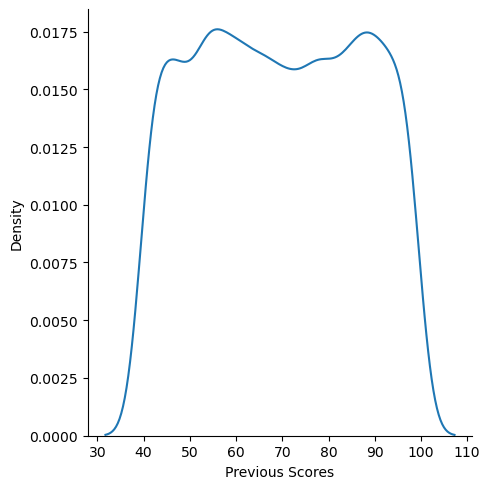

In [95]:
sns.displot(data=students_data, x="Previous Scores", kind="kde")

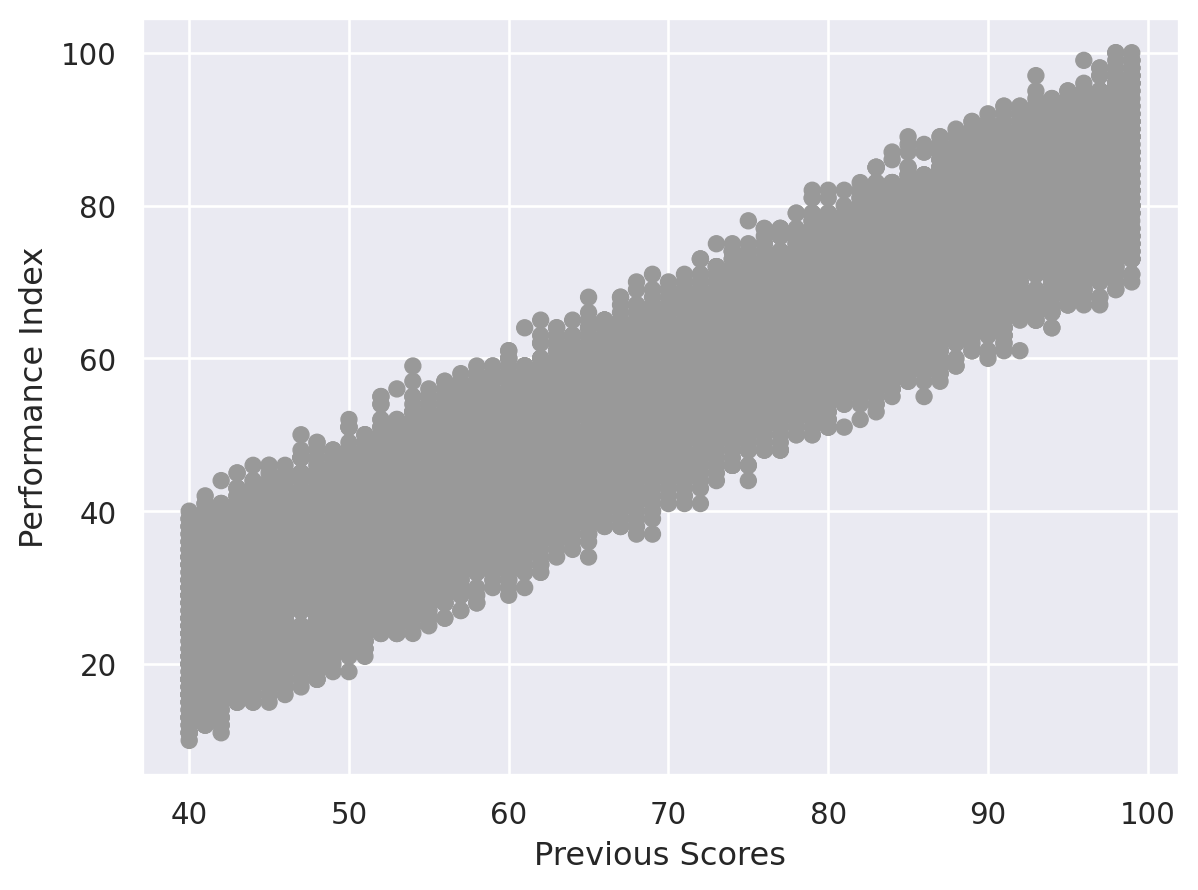

In [96]:
(
    so.Plot(
        students_data, x="Previous Scores", y="Performance Index",
    )
    .add(so.Dot(color=".6"))
)

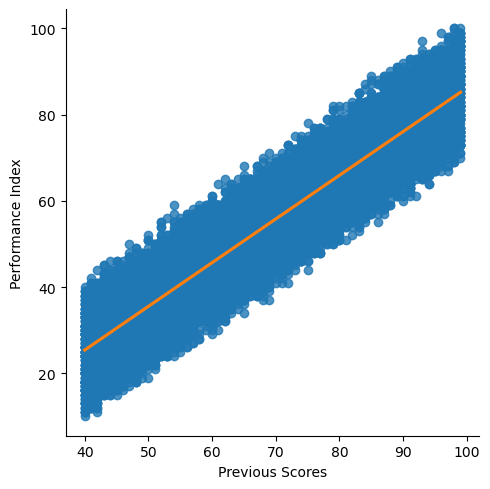

In [97]:
sns.lmplot(x="Previous Scores", y="Performance Index", data=students_data, line_kws={"color": "C1"})

<AxesSubplot: xlabel='Performance Index', ylabel='Count'>

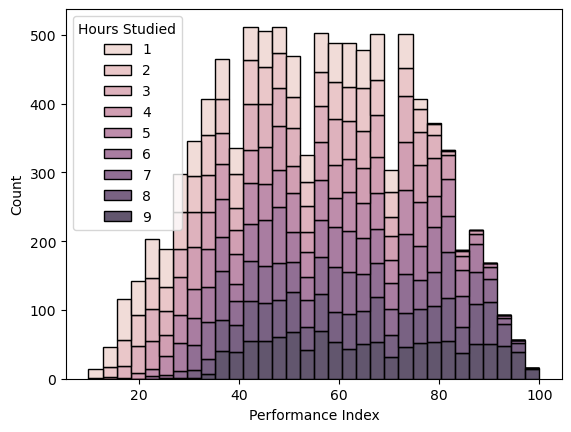

In [98]:
sns.histplot(data=students_data, x="Performance Index", hue="Hours Studied", multiple="stack")

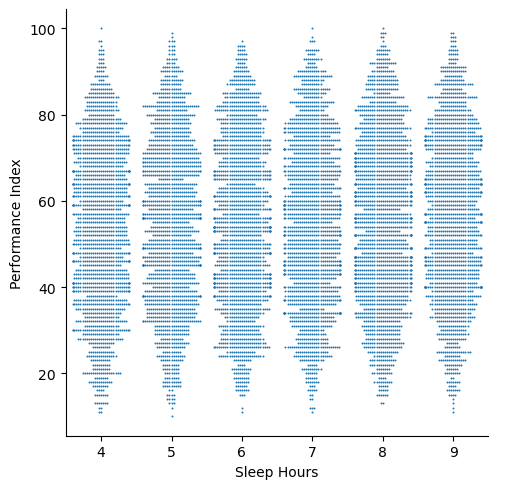

In [99]:
sns.catplot(x = 'Sleep Hours', y = 'Performance Index', data = students_data, kind = 'swarm', s = 2)

<AxesSubplot: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

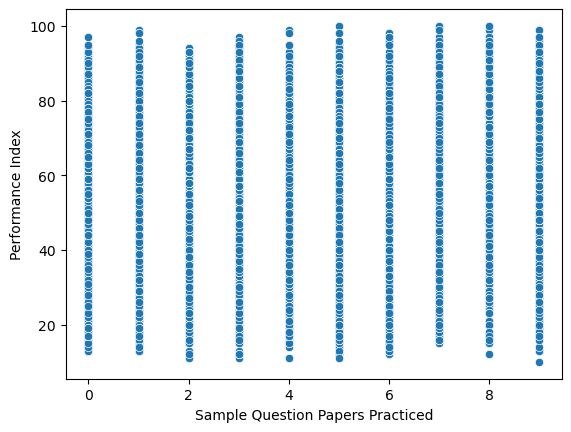

In [100]:
sns.scatterplot(data=students_data, x="Sample Question Papers Practiced", y="Performance Index")

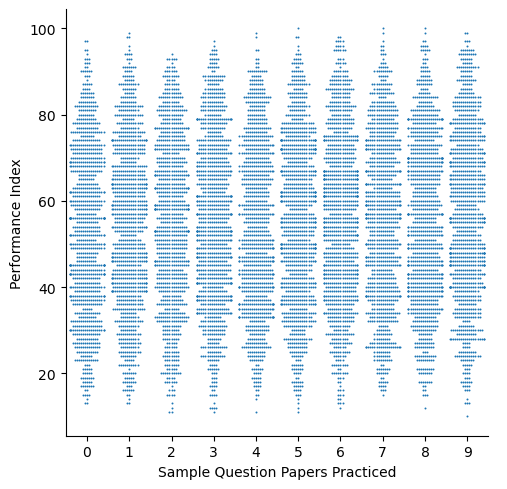

In [101]:
sns.catplot(x = 'Sample Question Papers Practiced', y = 'Performance Index', data = students_data, kind = 'swarm', s = 2)

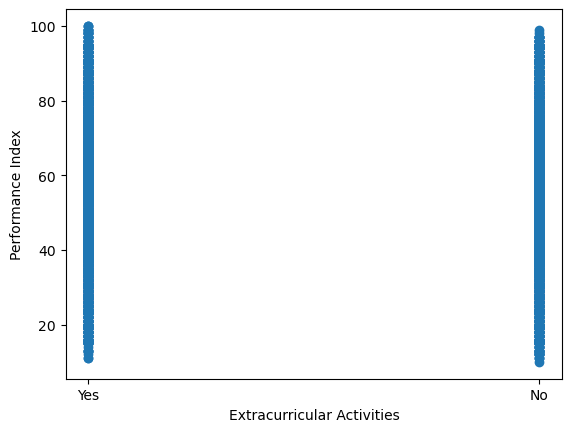

In [102]:
plt.scatter(students_data["Extracurricular Activities"], students_data["Performance Index"])
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.show()

In [103]:
'''
Original code:
for i in range(0, len(students_data)):
    if students_data["Extracurricular Activities"][i] == 'Yes':
        students_data["Extracurricular Activities"][i] = 1
    else:
        students_data["Extracurricular Activities"][i] = 0

Ternary syntax:
General ternary syntax: value_true if <test> else value_false
for i in range(0, len(students_data)):
    students_data["Extracurricular Activities"][i] = 1 if students_data["Extracurricular Activities"][i] == 'Yes' else 0

Another way can be: [value_false, value_true][<test>]
for i in range(0, len(students_data)):
    students_data["Extracurricular Activities"][i] = [1, 0][students_data["Extracurricular Activities"][i] == 'Yes']

This evaluates both branches before choosing one. To only evaluate the chosen branch: [lambda: value_false, lambda: value_true][<test>]()
for i in range(0, len(students_data)):
    students_data["Extracurricular Activities"][i] = [lambda: 1, lambda: 0][students_data["Extracurricular Activities"][i] == 'Yes']()

Because we have a pandas dataframe the fastest way to do this is:
students_data['Extracurricular Activities'] = (students_data['Extracurricular Activities'] == 'Yes').astype(int)
'''

students_data['Extracurricular Activities'] = (students_data['Extracurricular Activities'] == 'Yes').astype(int)

students_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [104]:
students_data.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


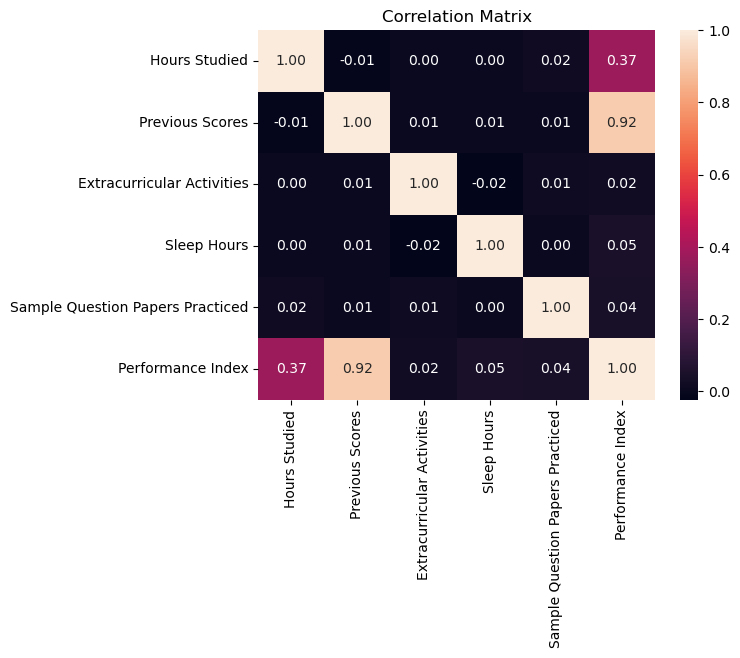

In [105]:
"""
sns.heatmap(students_data.corr(), annot=True, fmt=".2f")
Parameters:
- 'annot' = If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
- 'ftm' = String formatting code to use when adding annotations. - '.2f' = number of digits after decimal point
"""

plt.title("Correlation Matrix")
sns.heatmap(students_data.corr(), annot=True, fmt=".2f")
plt.show()

> ```Important``` We can observe from the previous plot that all features are relevant, so the most suitable model would be a Multi Linear Regression model

***

### [Training a Linear Regression](#training-a-linear-regression)

In [106]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### ```Using Only One Feature```

In [107]:
X = students_data[['Previous Scores']]
y = students_data['Performance Index']

In [108]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

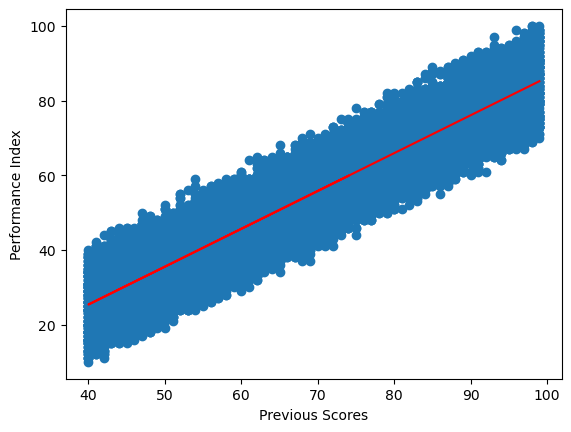

In [109]:
plt.plot(X, y_pred, color='red')

plt.scatter(X, y)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

In [110]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.610032876950048
Mean Square Error: 59.9501223772149
Root Mean Square Error: 7.742746436324445


#### ```Using All Features```

<div class="alert alert-block alert-warning">
Multiple Linear Regression
</div>

<div class="alert alert-block alert-warning">
Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship.

Equation: Y = β0 + β1X1 + β2X2 + β3X3 + … + βnXn + e

Y = Dependent variable / Target variable

β0 = Intercept of the regression line

β1, β2, β3, …. βn = Slope of the regression line which tells whether the line is increasing or decreasing

X1, X2, X3, ….Xn = Independent variable / Predictor variable

e = Error
</div>

In [111]:
X = students_data[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [112]:
y = students_data["Performance Index"]
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [113]:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

In [114]:
reg_model_diff = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred})
reg_model_diff.head()

,Actual value,Predicted value
0,91.0,91.852009
1,65.0,63.157787
2,45.0,45.052832
3,36.0,36.551201
4,66.0,67.091339


In [115]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 1.617482277939707
Mean Square Error: 4.151350633946038
Root Mean Square Error: 2.037486351842887


> ```Conclusion``` The best method of training this Linear Regression is by using all features

Let's see how it works with a train and test dataset (like in a real-world scenario)

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 4.0826


Other methods that can be used, but in this case less efficient

In [118]:
from sklearn import datasets, ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import pickle

In [119]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

with open('model.pkl','wb') as file:
    pickle.dump(model, file)

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 4.4257


In [120]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 5.1966
